In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import kstest_normal
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [12]:
# Import the data
data = pd.read_excel('Survey.xlsx', sheet_name='1')
# Renaming the columns
column_names = ['timestamp', 'age_18_or_older', 'comfortable_with_horror', 'purpose_understanding', 'age', 'gender', 'horror_gaming_experience']

# Add monster column names
for size in ['human', 'colossal']:
    for shape in ['humanoid', 'quadruped']:
        for color in ['black', 'white', 'red', 'blue', 'yellow']:
            for semantic in ['ghosty', 'devil', 'evil']:
                column_names.append(f"{size}_{shape}_{color}_{semantic}_rating")

column_names.append('email')

# Set the new column names
data.columns = column_names

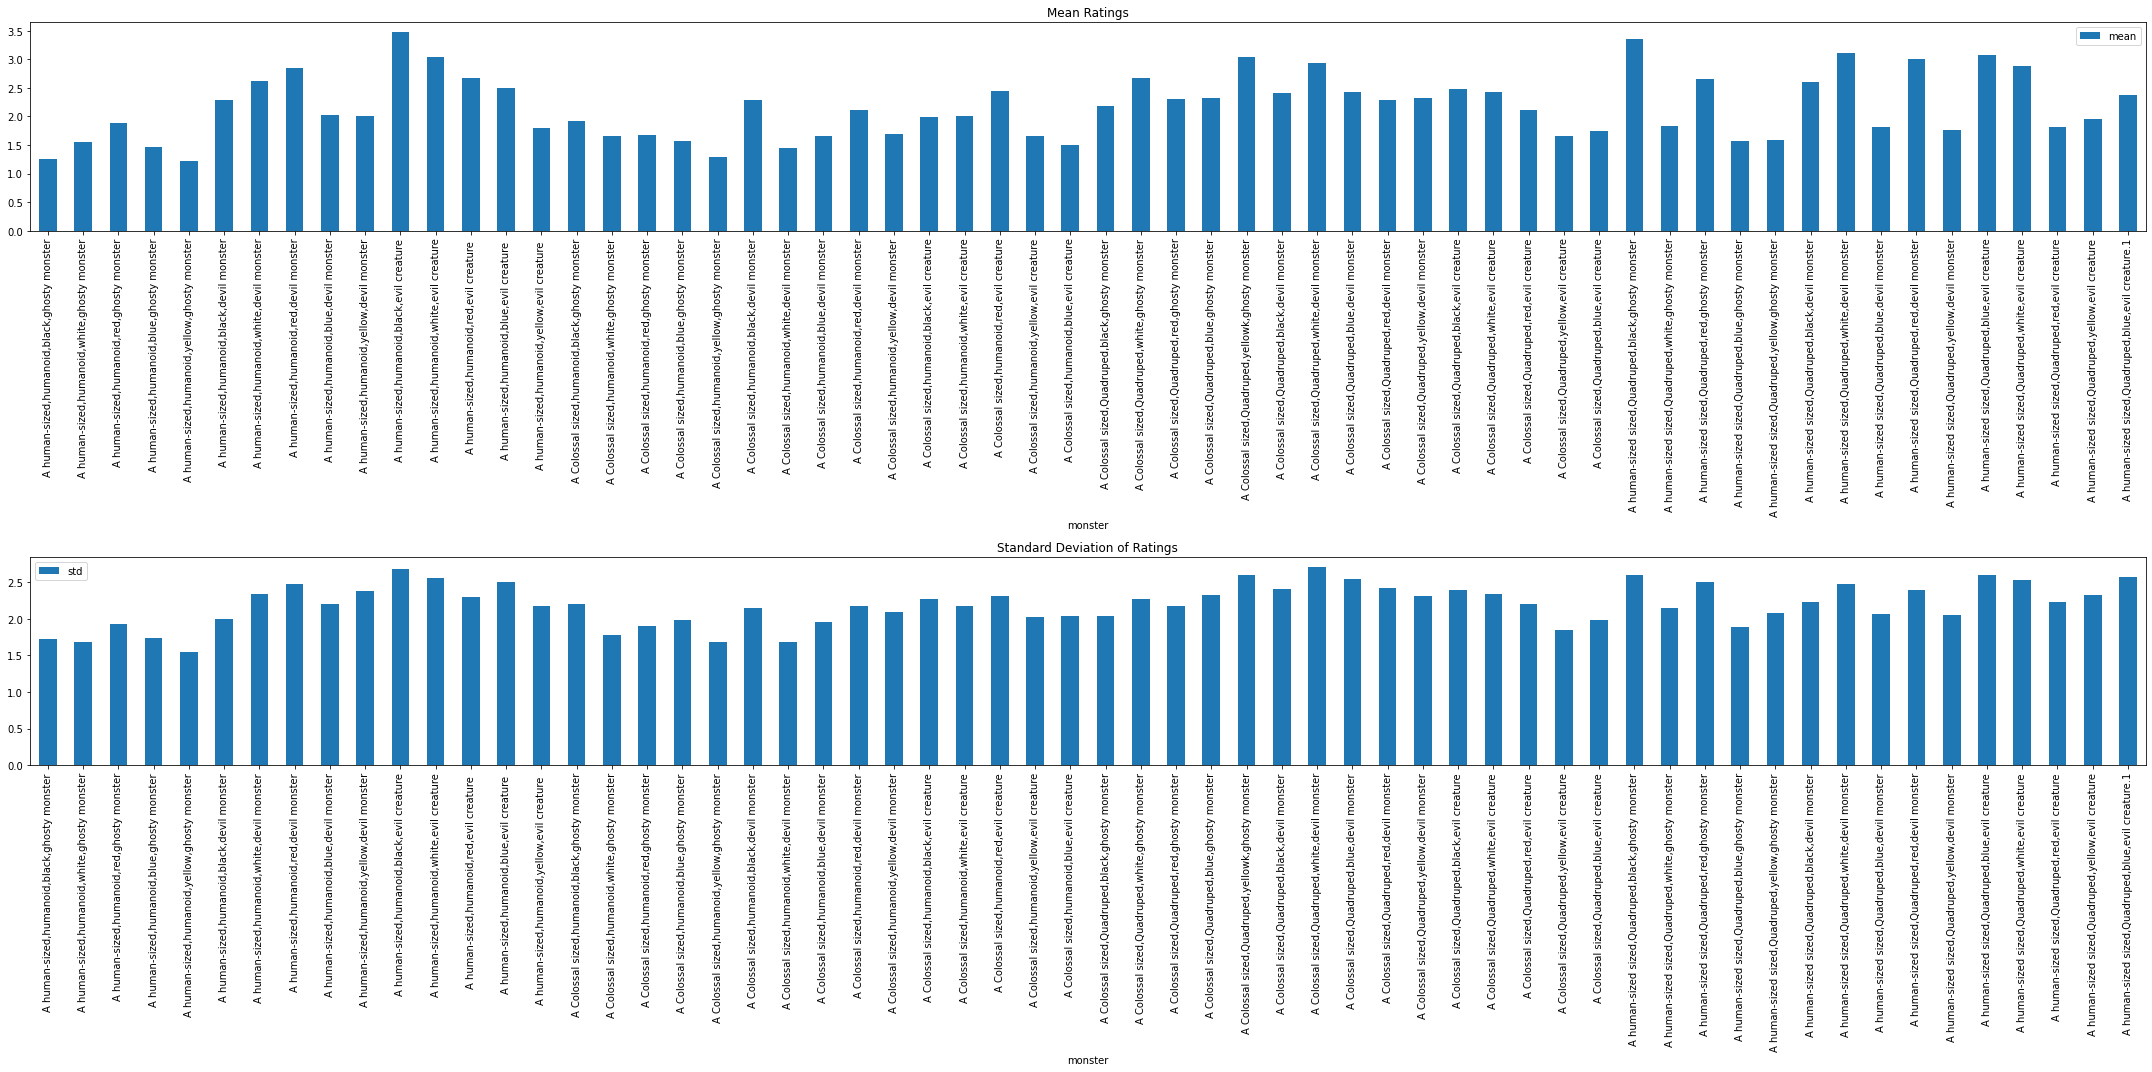

In [21]:
# Calculate descriptive statistics for ratings
mean_std_data = []
for col in data.columns[7:-1]:  # Exclude non-rating columns (the first 7 columns and the last one)
    mean_std_data.append((col, data[col].mean(), data[col].std()))

# Create a DataFrame for mean and standard deviation
mean_std_df = pd.DataFrame(mean_std_data, columns=['monster', 'mean', 'std'])

# Create bar plots for mean and standard deviation
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15))
mean_std_df.plot.bar(x='monster', y='mean', ax=axes[0], title='Mean Ratings', rot=90)
mean_std_df.plot.bar(x='monster', y='std', ax=axes[1], title='Standard Deviation of Ratings', rot=90)

# Adjust layout and display the graphs
plt.tight_layout()
plt.show()

In [32]:
data_long = data.melt(id_vars=['timestamp', 'age_18_or_older', 'comfortable_with_horror',
                               'purpose_understanding', 'age', 'gender', 'horror_gaming_experience', 'email'],
                      var_name='monster', value_name='rating')

# Extract factors from the 'monster' column
split_monster = data_long['monster'].str.split('_', expand=True)

# Assign only the first four columns from the split data to the new columns
data_long[['size', 'shape', 'color', 'semantic']] = split_monster.iloc[:, :4]

# Run the Linear Mixed-Effects Model
model_formula = "rating ~ C(size) * C(shape) * C(color) * C(semantic)"
mixed_model = smf.mixedlm(model_formula, data_long, groups=data_long['timestamp'], re_formula="~C(size)")
mixed_result = mixed_model.fit()

# Print the results
print(mixed_result.summary())



KeyError: "The following 'id_vars' are not present in the DataFrame: ['age', 'age_18_or_older', 'comfortable_with_horror', 'email', 'gender', 'horror_gaming_experience', 'purpose_understanding', 'timestamp']"

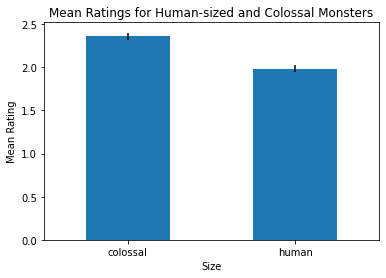

In [18]:
# Filter the data_long DataFrame to only include rows with human-sized and colossal monsters
size_data = data_long[data_long['size'].isin(['human', 'colossal'])]

# Calculate the mean rating and standard error for each size
size_mean_std = size_data.groupby('size')['rating'].agg(['mean', 'std', 'count'])
size_mean_std['sem'] = size_mean_std['std'] / np.sqrt(size_mean_std['count'])

# Create a bar plot with error bars
fig, ax = plt.subplots()
size_mean_std['mean'].plot(kind='bar', yerr=size_mean_std['sem'], ax=ax)
ax.set_title('Mean Ratings for Human-sized and Colossal Monsters')
ax.set_xlabel('Size')
ax.set_ylabel('Mean Rating')
plt.xticks(rotation=0)

# Display the plot
plt.show()